In [1]:
#import stuff we will need
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

#import functions from my .py files
from acquire import get_zillow_data
from prep import remove_outlier, clean_zillow, train_validate_test, get_object_cols, get_numeric_X_cols, min_max_scale, clean_zillow_taxes, remove_outlier_tax
from explore import plot_variable_pairs, plot_pairplot, correlation_exploration, get_zillow_heatmap

In [2]:
df = get_zillow_data()
df

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,14634203,2026522,1.0,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,289445.0,2016.0,213516.0,3490.16,NaN,NaN,6.059001e+13,625,-0.061973,2017-08-04
1,11721753,616260,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,205123.0,2016.0,163175.0,2627.48,NaN,NaN,6.037220e+13,1018,0.017785,2017-07-21
2,11289917,2061546,1.0,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,1248,-0.362001,2017-06-23
3,11637029,2554497,1.0,NaN,NaN,2.0,3.0,NaN,9.0,2.0,...,810694.0,2016.0,554156.0,9407.01,Y,13.0,6.037701e+13,1734,-0.093399,2017-07-28
4,11705026,1834372,NaN,NaN,NaN,1.0,2.0,NaN,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,NaN,NaN,6.037232e+13,1772,-0.146056,2017-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38617,14453399,356752,NaN,NaN,NaN,3.0,5.0,NaN,NaN,3.0,...,852813.0,2016.0,496831.0,11662.88,NaN,NaN,6.059032e+13,72840,0.062928,2017-08-31
38618,12019061,2108804,1.0,NaN,NaN,2.0,1.0,NaN,9.0,2.0,...,492395.0,2016.0,366200.0,6023.37,NaN,NaN,6.037701e+13,72841,0.000231,2017-08-31
38619,11570288,108621,1.0,NaN,NaN,2.0,2.0,NaN,7.0,2.0,...,600608.0,2016.0,446625.0,7255.87,NaN,NaN,6.037264e+13,72842,-0.003178,2017-08-31
38620,11128688,2001476,1.0,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,1120000.0,2016.0,728000.0,13663.03,NaN,NaN,6.037108e+13,72843,0.024946,2017-08-31


In [3]:
new_tax = clean_zillow_taxes(df)
new_tax

,sqft,baths,beds,tax_value,fips,tax_amount,age,tax_rate
parcel_id,,,,,,,,
14634203,1125.0,2.0,3.0,289445.0,6059.0,3490.16,43.0,0.012058
11721753,1316.0,2.0,3.0,205123.0,6037.0,2627.48,94.0,0.012809
11289917,1458.0,2.0,3.0,136104.0,6037.0,2319.90,47.0,0.017045
11637029,1766.0,2.0,3.0,810694.0,6037.0,9407.01,37.0,0.011604
11705026,1421.0,1.0,2.0,35606.0,6037.0,543.69,106.0,0.015270
...,...,...,...,...,...,...,...,...
14453399,3015.0,3.0,5.0,852813.0,6059.0,11662.88,15.0,0.013676
12019061,769.0,2.0,1.0,492395.0,6037.0,6023.37,53.0,0.012233
11570288,1212.0,2.0,2.0,600608.0,6037.0,7255.87,48.0,0.012081


In [4]:
new_tax = remove_outlier_tax(new_tax)

In [5]:
new_tax['county'] = new_tax['fips'].map({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'})
new_tax

,sqft,baths,beds,tax_value,fips,tax_amount,age,tax_rate,county
parcel_id,,,,,,,,,
14634203,1125.0,2.0,3.0,289445.0,6059.0,3490.16,43.0,0.012058,Orange
11721753,1316.0,2.0,3.0,205123.0,6037.0,2627.48,94.0,0.012809,Los Angeles
11289917,1458.0,2.0,3.0,136104.0,6037.0,2319.90,47.0,0.017045,Los Angeles
11637029,1766.0,2.0,3.0,810694.0,6037.0,9407.01,37.0,0.011604,Los Angeles
11705026,1421.0,1.0,2.0,35606.0,6037.0,543.69,106.0,0.015270,Los Angeles
...,...,...,...,...,...,...,...,...,...
14453399,3015.0,3.0,5.0,852813.0,6059.0,11662.88,15.0,0.013676,Orange
12019061,769.0,2.0,1.0,492395.0,6037.0,6023.37,53.0,0.012233,Los Angeles
11570288,1212.0,2.0,2.0,600608.0,6037.0,7255.87,48.0,0.012081,Los Angeles


In [8]:
county_mean_tax_rate = pd.DataFrame(round(new_tax.groupby('county').tax_rate.mean(), 5)*100)
county_mean_tax_rate.columns = ['tax_rate_percent']
county_mean_tax_rate

,tax_rate_percent
county,
Los Angeles,1.376
Orange,1.204
Ventura,1.188


In [9]:
#let's pull all of the tax rates from each county to graph a distribution. 
los_angeles_tax = new_tax[new_tax.county == "Los Angeles"].tax_rate
orange_tax = new_tax[new_tax.county == "Orange"].tax_rate
ventura_tax = new_tax[new_tax.county == "Ventura"].tax_rate

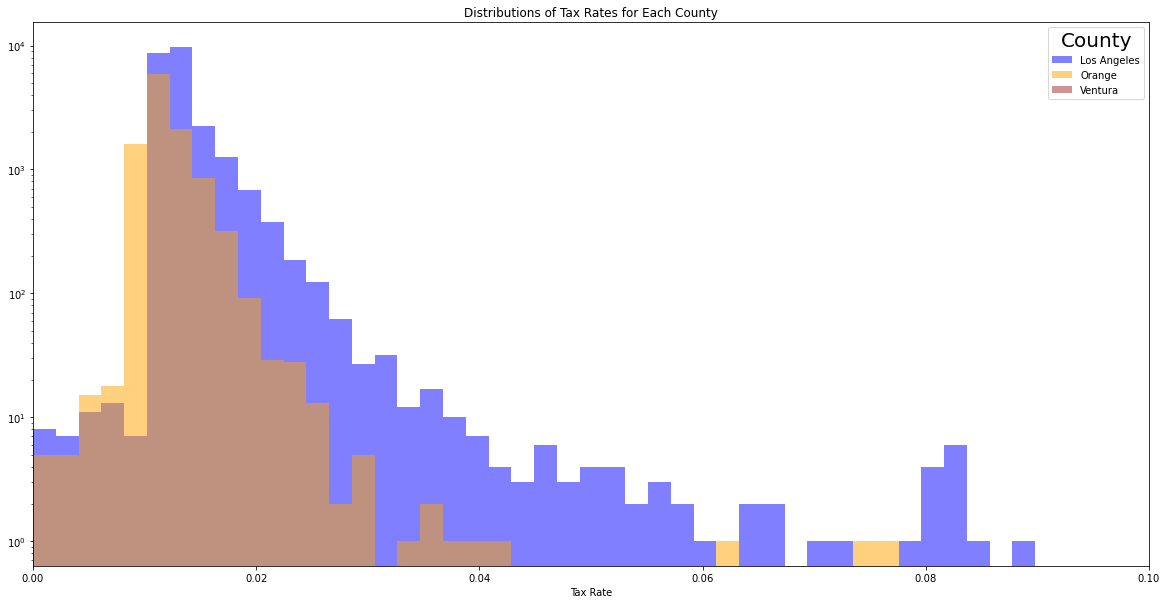

In [21]:
plt.figure(figsize=(20,10))
    # start plot
plt.hist(new_tax[new_tax.county == 'Los Angeles'].tax_rate, bins=np.linspace(0, 0.1, 50), color='blue', alpha=0.50, log=True, label='Los Angeles')
plt.hist(new_tax[new_tax.county == 'Orange'].tax_rate, bins=np.linspace(0, 0.1, 50), color='orange', alpha=0.50, log=True, label='Orange')
plt.hist(new_tax[new_tax.county == 'Venture'].tax_rate, bins=np.linspace(0, 0.1, 50), color='brown', alpha=0.50, log=True, label='Ventura')
plt.rcParams['legend.title_fontsize'] = 20
plt.xlim(0, 0.1)
plt.xlabel('Tax Rate')
plt.title('Distributions of Tax Rates for Each County')
plt.legend(title='County')
plt.show()
    